In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<a name='0'></a>
# Exploratory Data Analysis (EDA)

EDA is an important step in ML project. This is where we get to dig into the data, trying to understand more about it.

By performing EDA, we can:
* Know the summary statistics
* Spot if there are missing values and the appropriate strategy for handling it
* Spot if the data is skewed (or imbalanced)
* Correlation between features
* Understand the important features (or attributes) worth keeping and unhelpful features
* Above all, answer some of the pressing questions about the data. These questions can be specific to data and its features but will around things like why this and this, or what could have caused this and this based on the analysis, etc...There are no right or wrong questions, the idea here is to use data to see if we can help answer some questions.

### Titanic shipwreck
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

### Real World Data Exploratory Analysis : Titanic

In this lab, we will use Titanic dataset which is available on Kaggle. We can also load it from Seaborn datasets but we will use the real data from [Kaggle](https://www.kaggle.com/c/titanic/data).

Contents:

* [1. Imports](#1)
* [2. Loading the dataset](#2)
* [3. Quick look into the dataset](#3)
* [4. Summary statistics](#4)
* [5. Univariate analysis](#5)
* [6. Multivariate analysis](#6)

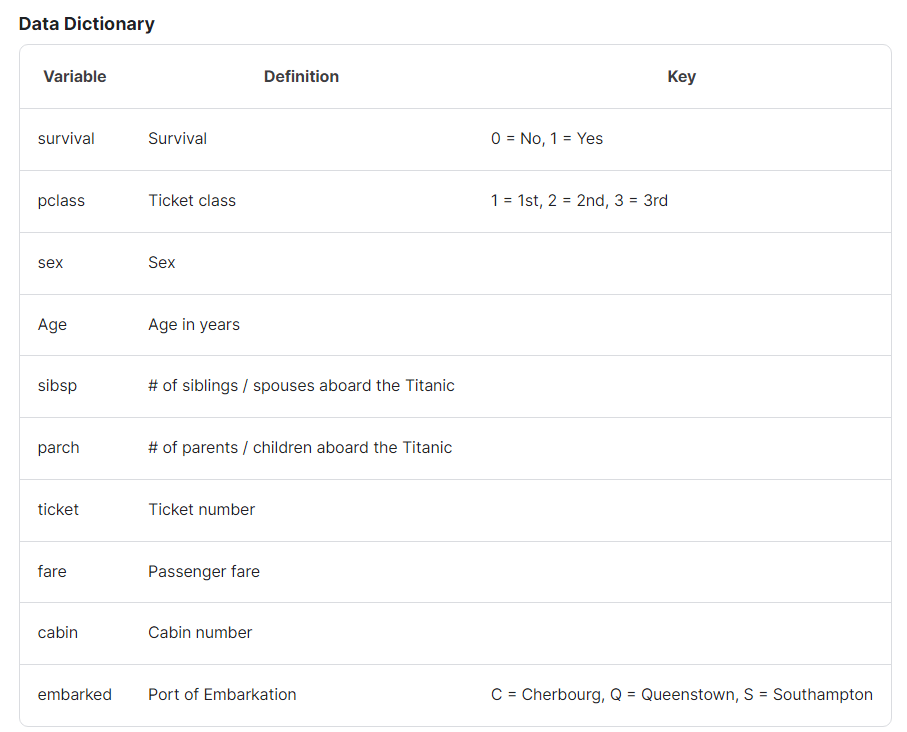

#### Variable Notes
* pclass: A proxy for socio-economic status (SES)
  - 1st = Upper
  - 2nd = Middle
  - 3rd = Lower
*age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
*sibsp: The dataset defines family relations in this way...
  - Sibling = brother, sister, stepbrother, stepsister
  - Spouse = husband, wife (mistresses and fiancés were ignored)
*parch: The dataset defines family relations in this way...
  - Parent = mother, father
  - Child = daughter, son, stepdaughter, stepson
  
  Some children travelled only with a nanny, therefore parch=0 for them.

<a name='1'></a>

## 1.   Imports

In [63]:
import pandas as pd
import numpy as np

<a name='2'></a>
    
## 2. Loading the dataset

In [ ]:
titanic_data = pd.read_csv('/content/drive/MyDrive/EDA/Uni&Multi/titanic.csv')

<a name='3'></a>
## 3. Quick look into the dataset

By default, df.head() will display the first five rows. But you can display the rows you want, just pass the integer.

Example: `titanic_data.head(10)`.

`df.tail()` will display the last rows

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
titanic_data.shape

(891, 12)

`df.columns` gives you the column labels present in the dataframe

In [ ]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
print(titanic_data.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


The `info()` method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<a name='4'></a>
## 4. Summary statistics

The `describe()` method returns description of the data in the DataFrame.

In [ ]:
# stats for numerical variables
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# stats for all variables including categorical
titanic_data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
titanic_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## 5. Univariate analysis

1. How many people survived the titanic crash? Can you use appropriate visualization(s) to showcase this?

`pandas.Series.value_counts` returns a Series containing counts of unique values.

In [ ]:
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
(titanic_data['Survived'].value_counts(normalize=True))*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

`pandas.DataFrame.plot` creates various kinds of plots of DataFrame using matplotlib or pylab

<Axes: >

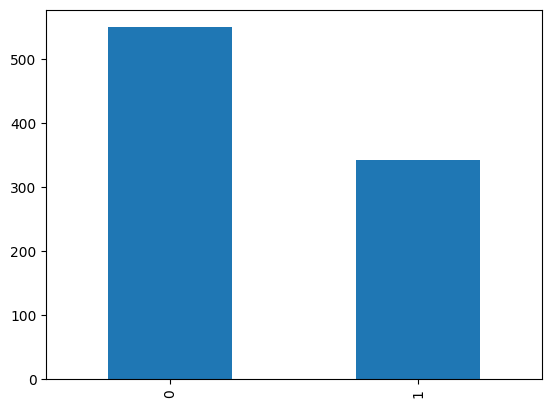

In [ ]:
titanic_data['Survived'].value_counts().plot(kind="bar")

<Axes: >

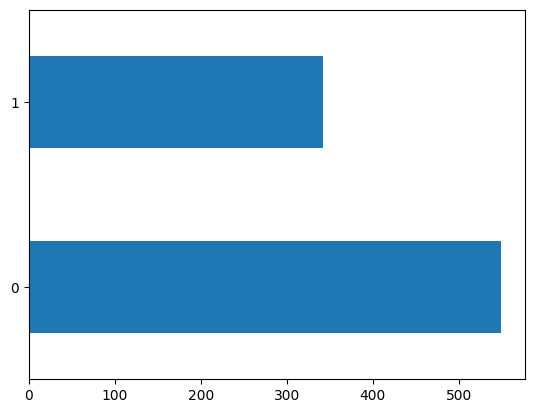

In [ ]:
titanic_data['Survived'].value_counts().plot(kind="barh")

2. What's the proportion of male and female passengers aboard in the decreasing order?

`pandas.DataFrame.sort_values` orders the values along either axis (index or columns)

In [ ]:
((titanic_data['Sex'].value_counts(normalize=True))*100).sort_values(ascending=False)

male      64.758698
female    35.241302
Name: Sex, dtype: float64

<Axes: ylabel='Sex'>

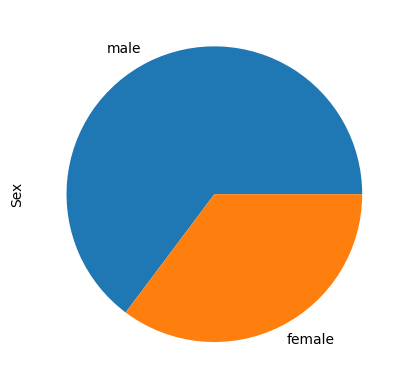

In [ ]:
((titanic_data['Sex'].value_counts(normalize=True))*100).sort_values(ascending=False).plot(kind="pie")

3. What's the average fare paid by each socio-economic class for this voyage?

* Group by aggregation allows us to group the data based on one or more specific columns' values and apply various operations to the grouped data.
* Using this we can split a dataset into groups based on a column or multiple columns.
* This enables us to analyze and manipulate the data at a more granular level, such as calculating summary statistics, applying transformations, or performing aggregations on each group independently.

In [ ]:
class_grouped_data = titanic_data.groupby('Pclass').agg({'Fare': 'mean'})

# Display the aggregated data
class_grouped_data

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


The groupby function is used to group the data based on the 'Pclass' column. The agg function is applied to specify the aggregations to be performed on different columns. In this example, the 'Fare' column is averaged.

4. How many passengers embarked from Cherbourg port?

In [ ]:
cher_passengers = titanic_data[titanic_data['Embarked']=="C"]
cher_passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C


In [ ]:
cher_passengers.PassengerId.count()

168

`pandas.DataFrame.query` is used to query the columns of a DataFrame with a boolean expression

In [ ]:
# A slightly more elegant way
titanic_data.query("Embarked=='C'").shape[0]

168

5. What can be inferred about the underlying distribution of ticket fare?

<Axes: ylabel='Frequency'>

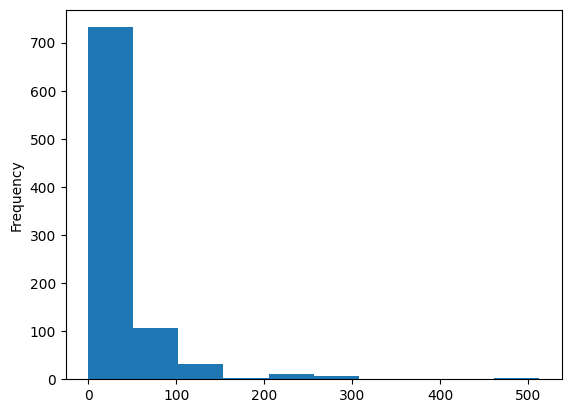

In [ ]:
# plotting histogram to deduce the distribution
titanic_data['Fare'].plot(kind="hist")

Ticket fare is positively skewed

Another useful tool is boxplot.

A box plot is a visual representation of the distribution of data, showing the extremes, median and quartiles. Using box plots, we can easily identify outliers. 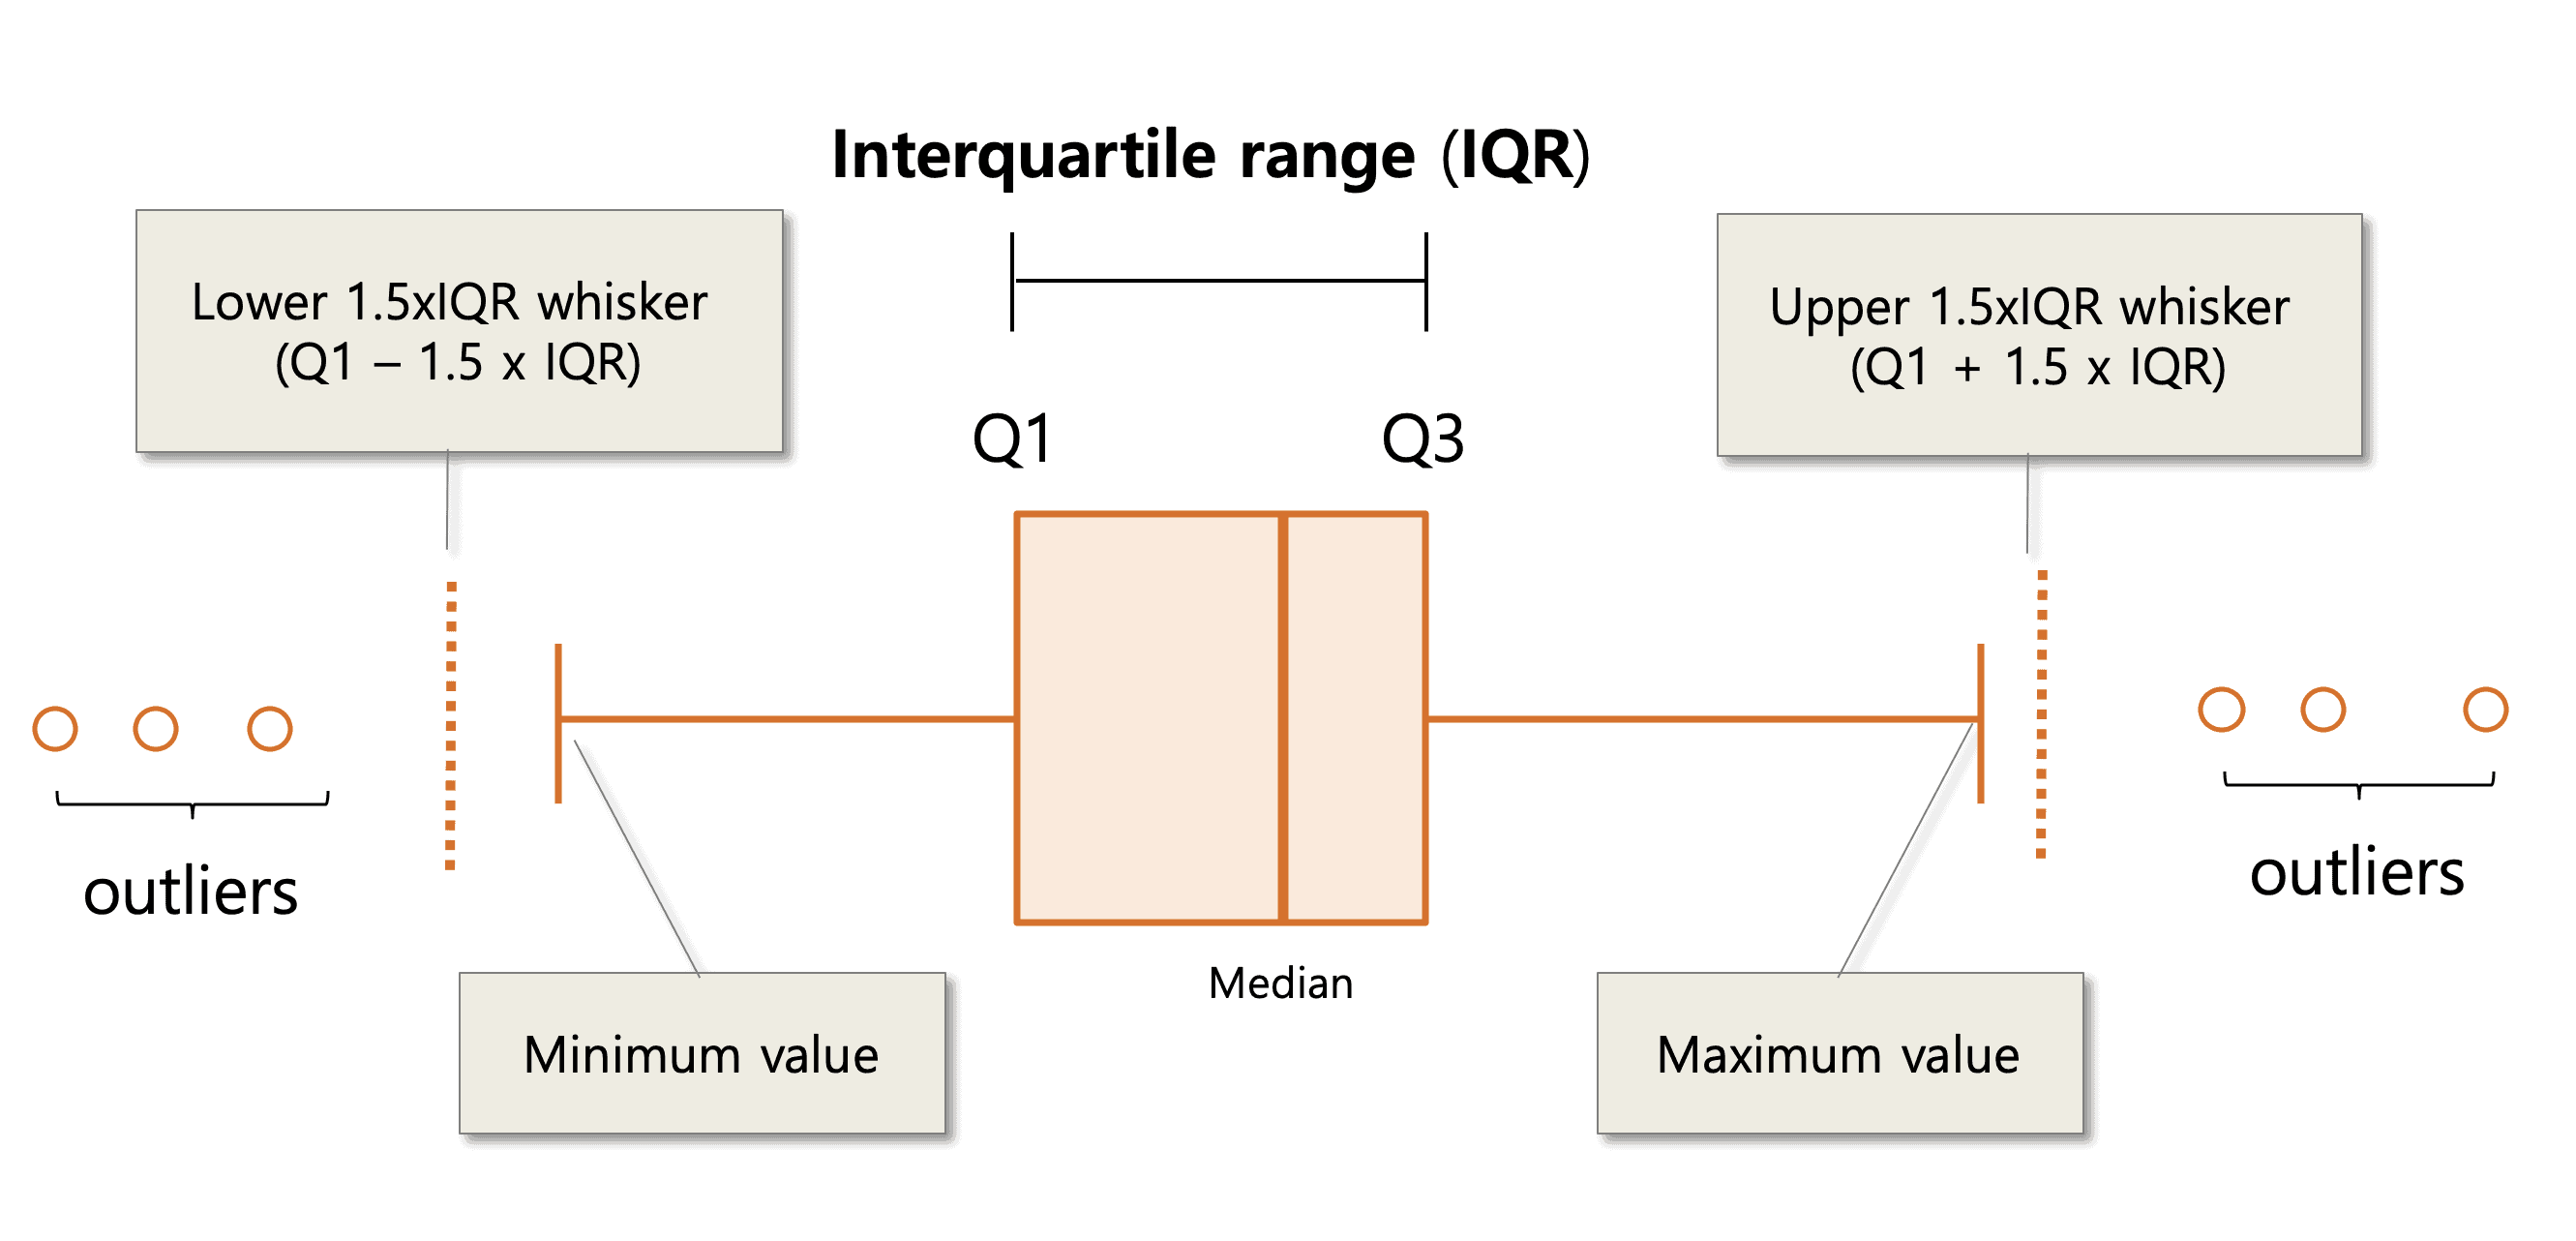

<Axes: >

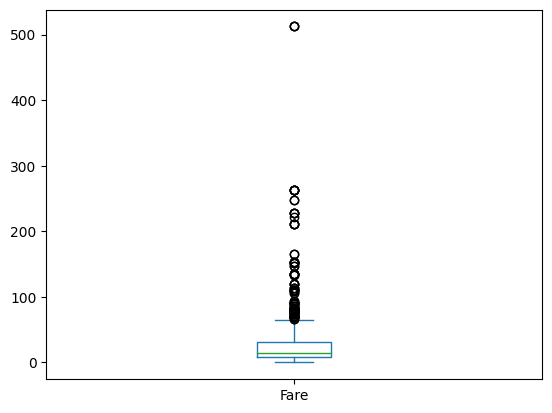

In [ ]:
titanic_data['Fare'].plot(kind="box")

6. Which age group has the highest number of survivors?

<Axes: ylabel='Frequency'>

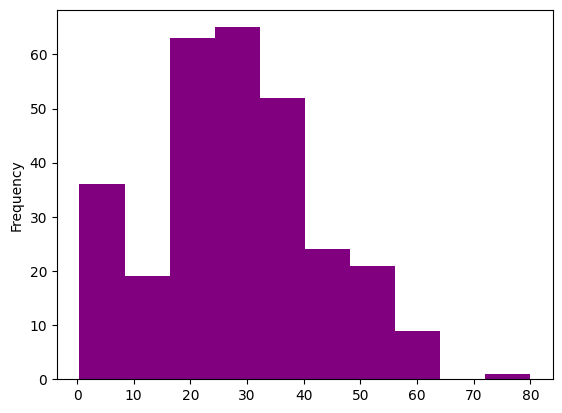

In [ ]:
surv_data = titanic_data.query("Survived==1")
surv_data['Age'].plot(kind="hist", color="purple")

Passengers belonging to the age bracket of 20-30 years appears to have survived the most

7. Amongst the passengers who were accompanied by at least 4 siblings or spouse, which passenger paid the highest fare?

In [67]:
sibsp_more_than4 = titanic_data[titanic_data['SibSp']>=4]
sibsp_more_than4.sort_values(by='Fare',ascending=False).head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


Miss Dorothy Edith "Dolly" Sage is the passenger in question

## 6. Multivariate analysis

8. Is there any correlation between age and fare?

Checking correlation enable you to see the similarity between features.

If two features correlate, that means they contain the same information and if one of them is removed, the analysis/model may be less affected.

<Axes: xlabel='Age', ylabel='Fare'>

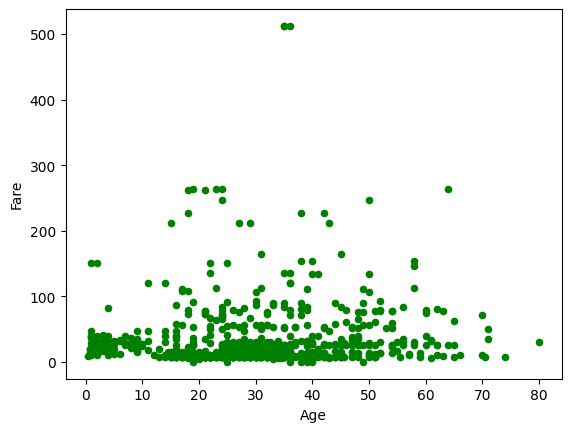

In [ ]:
# using scatter plot
titanic_data.plot(x="Age", y="Fare", kind="scatter", color="green")

`pandas.DataFrame.corr` computes pairwise correlation of columns, excluding NA/null values

In [ ]:
# using correlation matrix
corr_matrix = titanic_data.corr(method='pearson')
corr_matrix

<ipython-input-49-a19432534a31>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = titanic_data.corr(method='pearson')


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
# Get the correlation values with respect to 'Fare' and sort them in descending order
fare_age_corr = corr_matrix['Fare'].sort_values(ascending=False)
fare_age_corr

Fare           1.000000
Survived       0.257307
Parch          0.216225
SibSp          0.159651
Age            0.096067
PassengerId    0.012658
Pclass        -0.549500
Name: Fare, dtype: float64

No discrenible correlation exists between age and fare

9. What's the number of male and female survivors based on the port embarkation?

In [ ]:
# using groupby
sex_survivor = titanic_data.groupby(by=['Embarked','Sex'])['Survived'].sum()
sex_survivor

Embarked  Sex   
C         female     64
          male       29
Q         female     27
          male        3
S         female    140
          male       77
Name: Survived, dtype: int64

Another manner of carrying out this analysis is via pivot tables.

`pandas.pivot_table` creates a spreadsheet-style pivot table as a DataFrame

In [ ]:
# using pivot table
sex_survivor = pd.pivot_table(data=titanic_data, index='Embarked', columns='Sex', values='Survived', aggfunc='sum')
sex_survivor

Sex,female,male
Embarked,,
C,64,29
Q,27,3
S,140,77


Yet another way to do this is using cross tabulation.

`pandas.crosstab` computes a simple cross tabulation of two (or more) factors.

By default, it computes a frequency table of the factors unless an array of values and an aggregation function are passed.

In [ ]:
sex_survivor = pd.crosstab(index=titanic_data.Embarked, columns=titanic_data.Sex, values=titanic_data.Survived, aggfunc='sum')
sex_survivor

Sex,female,male
Embarked,,
C,64,29
Q,27,3
S,140,77


In [ ]:
## end of notebook